In [1]:
import zipfile
with zipfile.ZipFile("corpusd_cleandata.zip",'r') as zip_ref:
    zip_ref.extractall("dir1")

In [1]:
import pandas as pd


In [2]:
from pathlib import Path
import json


In [6]:
p = Path(r'dir1/corpusd_cleandata/004ca50f-893e-4484-9e4d-3324ec705edf.json')

In [7]:
with p.open('r', encoding='utf-8') as f:
            data = json.loads(f.read())

In [8]:
df = pd.json_normalize(data)

In [9]:
df.to_csv('test.csv',index = False,encoding='utf-8')

In [3]:
import numpy as np
df1 = pd.read_csv('test.csv')
df1

,id,copyright,geoOrigin,sourceType,source,corpus_document_id,description,serviceName,locationCode,sourceClass,...,naviga_enrichment.person,naviga_enrichment.companies,enriched_text.entities,enriched_text.semantic_roles,enriched_text.categories,enriched_text.relations,enriched_text.keywords,extracted_metadata.sha1,extracted_metadata.filename,extracted_metadata.file_type
0,004ca50f-893e-4484-9e4d-3324ec705edf,"(c) 2020, TenderNews.com Provided by SyndiGat...","New Delhi, India",General Newswire,TenderNews.com - Tenders (India),70085699434832011030,more info: Location: KENYA BidDate: 6/ 15/ 202...,Middle East & North African Newspapers,"[{'parent': 'LR/afr', 'relevance_score': '9', ...",Business and Commerce,...,[],[],"[{'count': 1, 'sentiment': {'score': 0, 'label...",[],"[{'score': 0.803566, 'label': '/law, govt and ...","[{'type': 'timeOf', 'sentence': 'more info : L...","[{'text': 'Tender Country', 'relevance': 0.918...",b097a0f41dd2f6b42c90004c9cad640d3447b718,202006050210ALBA____ME_NA_NE_12621_176208572_1...,json


In [4]:
## similarly we can save the csv file#######

In [5]:
df1[['text']]

,text
0,fencing of riat market in kanyikela ward.\n\nm...


In [6]:
df2=pd.read_csv("test1.csv")

In [7]:
df2[['text']]

,text
0,"If you've always wanted to try fishing, now is..."


In [8]:
df3= pd.read_csv("test2.csv")

In [9]:
df3[['text']]

,text
0,"VILNIUS, Jun 05, BNS - Visitors from low-risk ..."


In [10]:
df4 = pd.read_csv('test3.csv')
df4[['text']]

,text
0,Adults have an opportunity to model good onlin...


In [11]:
df5 = pd.read_csv("test4.csv")
df5[['text']]

,text
0,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,..."


In [12]:
df7 = pd.read_csv("test5.csv")
df7[['text']]

,text
0,"If you've always wanted to try fishing, now is..."


In [13]:
df8 = pd.read_csv('test6.csv')
df8[['text']]

,text
0,IT seems fitting that the first major European...


In [14]:
df9 = pd.read_csv('test7.csv')
df9[['text']]

,text
0,Company : BUSAN METROPOLITAN OFFICE OF EDUCATI...


In [15]:
df10 = pd.read_csv('test8.csv')
df10[['text']]

,text
0,Punk and metal are commonly perceived as two s...


In [16]:
df11 = pd.read_csv('test9.csv')
df11[['text']]

,text
0,Members of the Jackson County Youth Council in...


In [17]:
df6 = pd.concat([df1[['text']],df2[['text']],df3[['text']],df4[['text']],df5[['text']],df7[['text']],df8[['text']],df9[['text']],df10[['text']],df11[['text']]],ignore_index=True)

In [18]:
df6

,text
0,fencing of riat market in kanyikela ward.\n\nm...
1,"If you've always wanted to try fishing, now is..."
2,"VILNIUS, Jun 05, BNS - Visitors from low-risk ..."
3,Adults have an opportunity to model good onlin...
4,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,..."
5,"If you've always wanted to try fishing, now is..."
6,IT seems fitting that the first major European...
7,Company : BUSAN METROPOLITAN OFFICE OF EDUCATI...
8,Punk and metal are commonly perceived as two s...
9,Members of the Jackson County Youth Council in...


In [19]:
import spacy

In [20]:
import re

In [21]:
import string 
nlp = spacy.load("en_core_web_sm")

In [23]:
def text_preprocess(tweet):
  tweet = tweet.lower()
  tweet = re.sub('(\r\n|rt|#|amp|2)','',tweet)
  tweet = re.sub('0+[a-z0-9]*','',tweet)
  doc = nlp(tweet)
  cleaned_tokens = [token.lemma_ for token in doc if ((token.text not in  nlp.Defaults.stop_words) and (token.text not in string.punctuation) and (token.is_space == False))]
  cleaned_tweet = " ".join(token for token in cleaned_tokens)
  return cleaned_tweet

In [24]:
df6['Cleaned_text'] = df6['text'].apply(text_preprocess)

In [25]:
df6

,text,Cleaned_text
0,fencing of riat market in kanyikela ward.\n\nm...,fencing riat market kanyikela ward info locati...
1,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...
2,"VILNIUS, Jun 05, BNS - Visitors from low-risk ...",vilnius jun bns visitor low risk country outsi...
3,Adults have an opportunity to model good onlin...,adult oppounity model good online behavior you...
4,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,...",company office xinhe sub district office peopl...
5,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...
6,IT seems fitting that the first major European...,fitting major european football league return ...
7,Company : BUSAN METROPOLITAN OFFICE OF EDUCATI...,company busan metropolitan office education bu...
8,Punk and metal are commonly perceived as two s...,punk metal commonly perceive separate genre im...
9,Members of the Jackson County Youth Council in...,member jackson county youth council invite joi...


In [26]:
## (1) Lemmatization
## (2) REMOVE STOPWORDS
## (3) TOKENISATION

In [27]:
def tokenised_text(tweet):
  tweet = tweet.lower()
  tweet = re.sub('(\r\n|rt|#|amp|2)','',tweet)
  tweet = re.sub('0+[a-z0-9]*','',tweet)
  doc = nlp(tweet)
  cleaned_tokens = [token.lemma_ for token in doc if ((token.text not in  nlp.Defaults.stop_words) and (token.text not in string.punctuation) and (token.is_space == False))]
  #cleaned_tweet = " ".join(token for token in cleaned_tokens)
  return cleaned_tokens

df6['tokenised'] = df6['Cleaned_text'].apply(tokenised_text)

In [28]:
df6

,text,Cleaned_text,tokenised
0,fencing of riat market in kanyikela ward.\n\nm...,fencing riat market kanyikela ward info locati...,"[fence, riat, market, kanyikela, ward, info, l..."
1,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye..."
2,"VILNIUS, Jun 05, BNS - Visitors from low-risk ...",vilnius jun bns visitor low risk country outsi...,"[vilnius, jun, bn, visitor, low, risk, country..."
3,Adults have an opportunity to model good onlin...,adult oppounity model good online behavior you...,"[adult, oppounity, model, good, online, behavi..."
4,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,...",company office xinhe sub district office peopl...,"[company, office, xinhe, sub, district, office..."
5,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye..."
6,IT seems fitting that the first major European...,fitting major european football league return ...,"[fitting, major, european, football, league, r..."
7,Company : BUSAN METROPOLITAN OFFICE OF EDUCATI...,company busan metropolitan office education bu...,"[company, busan, metropolitan, office, educati..."
8,Punk and metal are commonly perceived as two s...,punk metal commonly perceive separate genre im...,"[punk, metal, commonly, perceive, separate, ge..."
9,Members of the Jackson County Youth Council in...,member jackson county youth council invite joi...,"[member, jackson, county, youth, council, invi..."


In [29]:
df6

,text,Cleaned_text,tokenised
0,fencing of riat market in kanyikela ward.\n\nm...,fencing riat market kanyikela ward info locati...,"[fence, riat, market, kanyikela, ward, info, l..."
1,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye..."
2,"VILNIUS, Jun 05, BNS - Visitors from low-risk ...",vilnius jun bns visitor low risk country outsi...,"[vilnius, jun, bn, visitor, low, risk, country..."
3,Adults have an opportunity to model good onlin...,adult oppounity model good online behavior you...,"[adult, oppounity, model, good, online, behavi..."
4,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,...",company office xinhe sub district office peopl...,"[company, office, xinhe, sub, district, office..."
5,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye..."
6,IT seems fitting that the first major European...,fitting major european football league return ...,"[fitting, major, european, football, league, r..."
7,Company : BUSAN METROPOLITAN OFFICE OF EDUCATI...,company busan metropolitan office education bu...,"[company, busan, metropolitan, office, educati..."
8,Punk and metal are commonly perceived as two s...,punk metal commonly perceive separate genre im...,"[punk, metal, commonly, perceive, separate, ge..."
9,Members of the Jackson County Youth Council in...,member jackson county youth council invite joi...,"[member, jackson, county, youth, council, invi..."


In [30]:
## TFIDF VECTORIZATION

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()
model_vect = model.fit_transform(df6['Cleaned_text'])
vocab = model.get_feature_names()

In [32]:
a = model_vect.toarray()
print(a)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08311474 0.09777154 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.0174015  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [33]:
row_avg = [sum(sub_list)/len(sub_list) for sub_list in a]
print(row_avg)

[0.003170753109400895, 0.00522961215736928, 0.005446907631160118, 0.01059715982372415, 0.005460127607788905, 0.00522961215736928, 0.007950878051720033, 0.005276407269141285, 0.010863533642984853, 0.005237052570489311]


In [34]:
data1 = pd.DataFrame(row_avg,columns = ['Avg_vector'])
data1    

,Avg_vector
0,0.003171
1,0.005230
2,0.005447
3,0.010597
4,0.005460
5,0.005230
6,0.007951
7,0.005276
8,0.010864
9,0.005237


In [35]:
data2 = pd.concat([df6,data1],axis=1,join = 'inner')
data2

,text,Cleaned_text,tokenised,Avg_vector
0,fencing of riat market in kanyikela ward.\n\nm...,fencing riat market kanyikela ward info locati...,"[fence, riat, market, kanyikela, ward, info, l...",0.003171
1,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye...",0.005230
2,"VILNIUS, Jun 05, BNS - Visitors from low-risk ...",vilnius jun bns visitor low risk country outsi...,"[vilnius, jun, bn, visitor, low, risk, country...",0.005447
3,Adults have an opportunity to model good onlin...,adult oppounity model good online behavior you...,"[adult, oppounity, model, good, online, behavi...",0.010597
4,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,...",company office xinhe sub district office peopl...,"[company, office, xinhe, sub, district, office...",0.005460
5,"If you've always wanted to try fishing, now is...",want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye...",0.005230
6,IT seems fitting that the first major European...,fitting major european football league return ...,"[fitting, major, european, football, league, r...",0.007951
7,Company : BUSAN METROPOLITAN OFFICE OF EDUCATI...,company busan metropolitan office education bu...,"[company, busan, metropolitan, office, educati...",0.005276
8,Punk and metal are commonly perceived as two s...,punk metal commonly perceive separate genre im...,"[punk, metal, commonly, perceive, separate, ge...",0.010864
9,Members of the Jackson County Youth Council in...,member jackson county youth council invite joi...,"[member, jackson, county, youth, council, invi...",0.005237


In [36]:
data2.drop(['text'],axis = 1,inplace = True)
data2

,Cleaned_text,tokenised,Avg_vector
0,fencing riat market kanyikela ward info locati...,"[fence, riat, market, kanyikela, ward, info, l...",0.003171
1,want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye...",0.005230
2,vilnius jun bns visitor low risk country outsi...,"[vilnius, jun, bn, visitor, low, risk, country...",0.005447
3,adult oppounity model good online behavior you...,"[adult, oppounity, model, good, online, behavi...",0.010597
4,company office xinhe sub district office peopl...,"[company, office, xinhe, sub, district, office...",0.005460
5,want try fishing chance fish license year week...,"[want, try, fishing, chance, fish, license, ye...",0.005230
6,fitting major european football league return ...,"[fitting, major, european, football, league, r...",0.007951
7,company busan metropolitan office education bu...,"[company, busan, metropolitan, office, educati...",0.005276
8,punk metal commonly perceive separate genre im...,"[punk, metal, commonly, perceive, separate, ge...",0.010864
9,member jackson county youth council invite joi...,"[member, jackson, county, youth, council, invi...",0.005237


In [37]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,random_state=42,max_iter=1)

In [38]:
lda_top=lda_model.fit_transform(model_vect)

In [39]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(10, 5)
[[0.03613683 0.03620389 0.03613138 0.03618332 0.85534459]
 [0.02375857 0.02371829 0.90489958 0.02390033 0.02372323]
 [0.02280965 0.02280675 0.02283584 0.02282727 0.90872049]
 [0.94988675 0.01252037 0.01253846 0.01253854 0.01251588]
 [0.02282843 0.90830026 0.02285321 0.02308038 0.02293771]
 [0.02375857 0.02371829 0.90489958 0.02390033 0.02372323]
 [0.01631685 0.01627888 0.93480669 0.0162805  0.01631707]
 [0.02344443 0.02356233 0.02345168 0.90598432 0.02355723]
 [0.01242228 0.01228272 0.01230981 0.01228533 0.95069986]
 [0.02365371 0.02361679 0.02362768 0.90542669 0.02367514]]


In [40]:
print(lda_model.components_)
print(lda_model.components_.shape)

[[0.20011049 0.20009302 0.20006529 ... 0.20003375 0.20640352 0.20004866]
 [0.23271016 0.20011202 0.27662698 ... 0.23830127 0.2000068  0.27673518]
 [0.20008651 0.20009784 0.20007989 ... 0.20004058 0.20000789 0.20004708]
 [0.28281439 0.29738929 0.20006721 ... 0.20004586 0.20000617 0.20004448]
 [0.20008813 0.20007936 0.20008163 ... 0.20003903 0.21097712 0.20004559]]
(5, 1434)


In [41]:
vocab = model.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
behavior online social communication medium world like punk pope adult 

Topic 1: 
district tianjin binhai document project new office obtain sub xinhe 

Topic 2: 
fishing virginia football dgif league return like club gov chionship 

Topic 3: 
pray police fishing krw youth council floyd virginia invite south 

Topic 4: 
tender eu kenya bay homa authority band country county minister 



In [42]:
!pip install mglearn

In [43]:
import mglearn as mg
sorting = np.argsort(lda_model.components_)[:,::-1]
features = np.array(model.get_feature_names())
mg.tools.print_topics(topics=range(5),feature_names= features,sorting = sorting,topics_per_chunk = 5,n_words = 25)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
behavior      district      fishing       pray          tender        
online        tianjin       virginia      police        eu            
social        binhai        football      fishing       kenya         
communication document      dgif          krw           bay           
medium        project       league        youth         homa          
world         new           return        council       authority     
like          office        like          floyd         band          
punk          obtain        club          virginia      country       
pope          sub           gov           invite        county        
adult         xinhe         chionship     south         minister      
message       contact       free          busan         non           
good          community     hope          estimate      bns           
church

In [44]:
import gensim

In [45]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data2['tokenised'])

texts = data2['tokenised']

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1)]]


In [46]:
lda_model1 = gensim.models.ldamodel.LdaModel(corpus = corpus,id2word = id2word,num_topics = 20,random_state = 100,update_every = 1,chunksize = 100,passes = 10,alpha = 'auto',per_word_topics = True)

In [46]:
!pip install pyldavis

In [47]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1,corpus,id2word)
vis

C:\Users\sumit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.118326  0.157181       1        1  29.769340
16    -0.030343 -0.285576       2        1  27.499761
1      0.343032  0.022612       3        1  15.355353
19    -0.052204 -0.012118       4        1  10.351224
4      0.041810  0.049683       5        1   7.155026
6      0.000023  0.037847       6        1   3.182025
8     -0.037930  0.000276       7        1   3.088203
15    -0.011307  0.036618       8        1   2.431761
3     -0.026403  0.011713       9        1   1.086659
13    -0.008446 -0.000626      10        1   0.007652
12    -0.012006 -0.007105      11        1   0.007539
17    -0.010901 -0.000643      12        1   0.007475
9     -0.010688 -0.002672      13        1   0.007427
14    -0.009961 -0.001508      14        1   0.007382
0     -0.003665  0.000184      15        1   0.007301
11    -0.011725  0.000441      16        1   0.007295
5     -0.009964 -0.001972      17        1   0.007287
2     -0.010736 -0.002315      18        1   0.007185
18    -0.009632 -0.001689      19        1   0.007062
7     -0.010628 -0.000331      20        1   0.007042, topic_info=               Term       Freq      Total Category  logprob  loglift
80          fishing  33.000000  33.000000  Default  30.0000  30.0000
1001           band  22.000000  22.000000  Default  29.0000  29.0000
283        behavior  20.000000  20.000000  Default  28.0000  28.0000
1269           punk  19.000000  19.000000  Default  27.0000  27.0000
120          online  24.000000  24.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
608          social   0.000170  11.443641  Topic20  -7.1879  -1.5554
317   communication   0.000169  10.516618  Topic20  -7.1951  -1.4781
173             way   0.000169  14.020398  Topic20  -7.1951  -1.7657
453            know   0.000168   8.549196  Topic20  -7.2010  -1.2768
58              day   0.000167  16.072685  Topic20  -7.2051  -1.9122

[1272 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
911       8  1.200542         +8
695       5  0.772465         --
912       8  1.200744        --1
697       5  0.772112       --15
698       5  0.930722  -66313599
...     ...       ...        ...
178       3  0.210772       year
694       2  0.896837      young
694       4  0.149473      young
1440      7  0.978097      youth
767       5  1.091951       zczb

[609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 17, 2, 20, 5, 7, 9, 16, 4, 14, 13, 18, 10, 15, 1, 12, 6, 3, 19, 8])

In [49]:
print(lda_model1.print_topics())

[(0, '0.001*"fishing" + 0.001*"virginia" + 0.001*"day" + 0.001*"band" + 0.001*"online" + 0.001*"punk" + 0.001*"free" + 0.001*"time" + 0.001*"album" + 0.001*"like"'), (1, '0.067*"fishing" + 0.028*"virginia" + 0.021*"free" + 0.019*"day" + 0.014*"trout" + 0.014*"license" + 0.011*"time" + 0.011*"regulation" + 0.011*"angler" + 0.011*"require"'), (2, '0.001*"behavior" + 0.001*"online" + 0.001*"like" + 0.001*"communication" + 0.001*"world" + 0.001*"football" + 0.001*"good" + 0.001*"medium" + 0.001*"live" + 0.001*"adult"'), (3, '0.037*"tender" + 0.019*"county" + 0.019*"homa" + 0.019*"authority" + 0.019*"bay" + 0.019*"kenya" + 0.010*"address" + 0.010*"location" + 0.010*"government" + 0.010*"country"'), (4, '0.037*"district" + 0.030*"tianjin" + 0.027*"new" + 0.027*"binhai" + 0.027*"document" + 0.020*"office" + 0.017*"project" + 0.013*"agency" + 0.013*"xinhe" + 0.013*"contact"'), (5, '0.001*"district" + 0.001*"new" + 0.001*"document" + 0.001*"tianjin" + 0.001*"online" + 0.001*"binhai" + 0.001*"be

C:\Users\sumit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## WORD CLOUD

In [50]:
combine_df6 = ' '.join(data2.Cleaned_text.values)

doc = nlp(combine_df6)

def token_n_tokenfreq(doc):
    token_freq = pd.Series([token.text for token in doc]).value_counts()
    
    print(token_freq[:5])
    
    return token_freq

token_freq = token_n_tokenfreq(doc)

C:\Users\sumit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fishing     38
like        28
online      26
band        24
behavior    22
dtype: int64


C:\Users\sumit\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


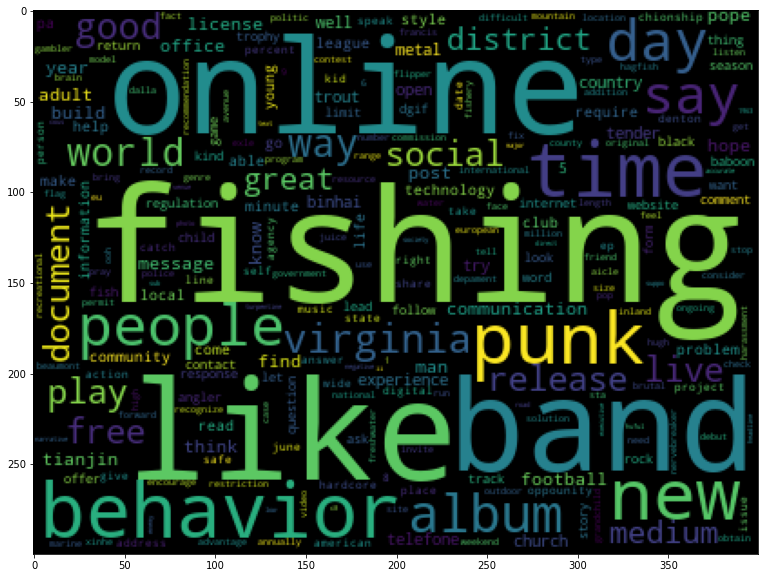

In [51]:
import os
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(width = 400,height = 300,max_words=250).generate_from_frequencies(token_freq)
plt.figure(figsize = (14,10))
plt.imshow(wc)